# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision



In [2]:
## Setting torch seed

random_seed = 1
torch.manual_seed(random_seed)

# Import fine tunning data

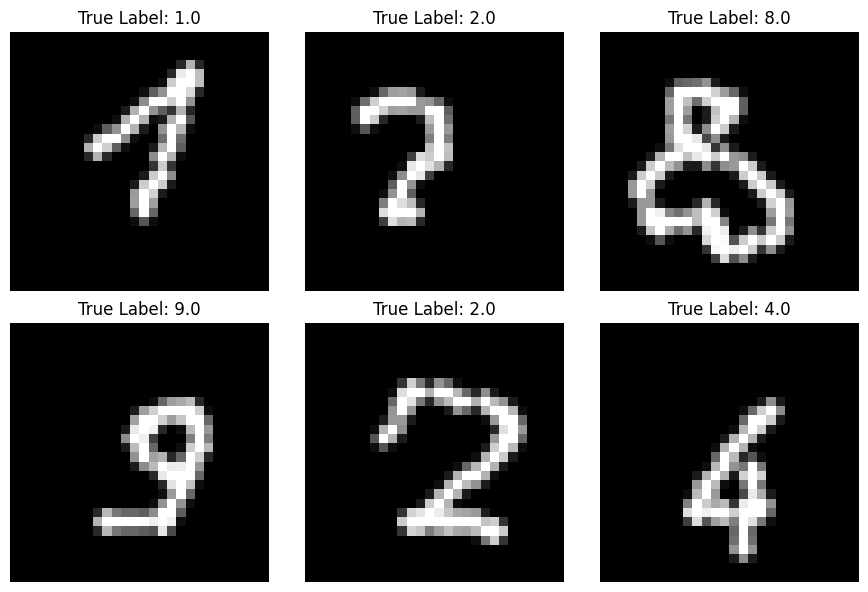

In [31]:
PATH = "fine_tune_data.csv"

line_data = np.genfromtxt(PATH, delimiter=',')


true_labels = [d[0] for d in line_data]
# Reshape, normalize in one line
data = [(np.array(d[1:], dtype=np.float32) / 255.0).reshape((28,28)) for d in line_data]


fig, axes = plt.subplots(2, 3, figsize=(9, 6))
axes = axes.flatten()

for i in range(6):
    ax = axes[i]
    ax.imshow(data[i], cmap='gray', vmin=0, vmax=1)
    ax.set_title(f"True Label: {true_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.savefig("six_images_subplots.png")

# Import model and model params